In [33]:
import graphelib as gr

### 1- Instanciez un objet de la classe Graphe et utilisez la methode afficher carte pour vérifier que tout marche bien.

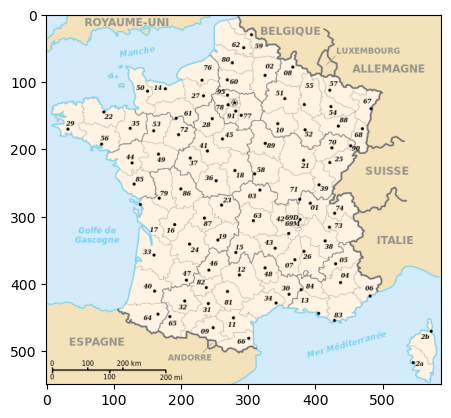

In [34]:
teste = gr.Graphe()
teste.afficher_carte()

### 2 - Implémenter Djikstra

In [35]:
def Djikstra(graphe, depart, arrive):
    E = {depart}
    d = {}
    prec = {}
    for a in graphe.dic_noeud.values():
        d[a] = float('inf')
        prec[a] = None
    d[depart] = 0
    while E:
        u = min(E, key = d.get)
        if u == arrive:
            return d[u], prec
        E.remove(u)
        for edge in u.aretes:
            v, poids = edge
            alt = d[u] + poids
            if alt < d[v]:
                d[v] = alt
                prec[v] = u
                if v not in E:
                    E.add(v)
    return d, prec

### 3 - Ajouter une fonction pour transformer ce que renvoie Dijkstra en le plus court chemin.

In [36]:
def shortest_path(graphe, depart, arrive):
    _, prec = Djikstra(graphe, depart, arrive)
    path = []
    u = arrive
    while u: 
        path.append(u)
        u = prec[u]
    return path[::-1]
    

In [69]:
nodes = teste.dic_noeud
path = shortest_path(teste, nodes[59], nodes[20])
for node in path:
    print(node.chef_lieu)

Lille
Laon
Châlons-en-Champagne
Chaumont
Dijon
Lons-le-Saunier
Bourg-En-Bresse
Grenoble
Gap
Digne-les-Bains
Nice
Ajaccio


### 4 - Afficher le resultat sur la carte

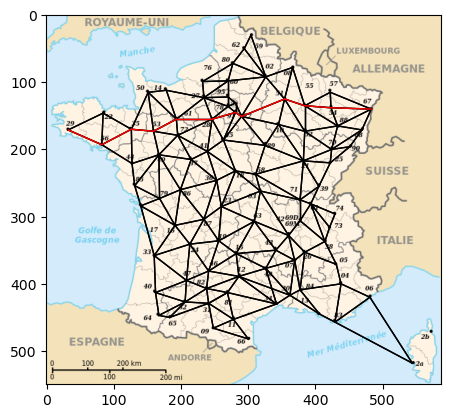

In [73]:
graphe = gr.Graphe()
carte = gr.Carte(graphe)
noeuds = graphe.dic_noeud
carte.afficher_chemin(shortest_path(graphe, noeuds[29], noeuds[67]))

### 2 - Implémenter A*

In [58]:
def Astar(graphe, depart, arrive):
    E = {depart}
    d = {}
    prec = {}
    f = {}
    for a in graphe.dic_noeud.values():
        d[a] = f[a] = float('inf')
        prec[a] = None
    d[depart] = 0
    f[depart] = gr.distance_km(depart, arrive)
    while E:
        u = min(E, key = f.get)
        if u == arrive:
            return d[u], prec
        E.remove(u)
        for edge in u.aretes:
            v, poids = edge
            alt = d[u] + poids
            if alt < d[v]:
                d[v] = alt
                prec[v] = u
                f[v]= d[v] + gr.distance_km(v, arrive)
                if v not in E:
                    E.add(v)
    return d, prec

In [60]:
def shortest_path_Astar(graphe, depart, arrive):
    _, prec = Astar(graphe, depart, arrive)
    path = []
    u = arrive
    while u: 
        path.append(u)
        u = prec[u]
    return path[::-1]

In [68]:
nodes = teste.dic_noeud
path = shortest_path_Astar(teste, nodes[59], nodes[20])
for node in path:
    print(node.chef_lieu)

Lille
Laon
Châlons-en-Champagne
Chaumont
Dijon
Lons-le-Saunier
Bourg-En-Bresse
Grenoble
Gap
Digne-les-Bains
Nice
Ajaccio


### 4 - Afficher le resultat sur la carte

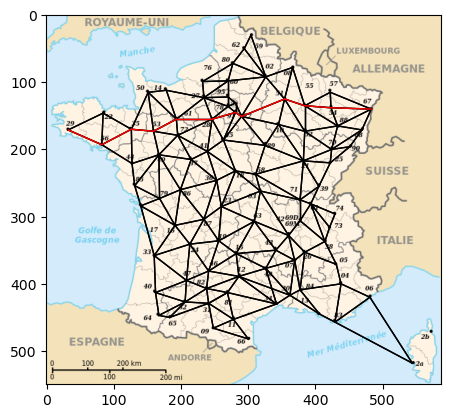

In [72]:
graphe = gr.Graphe()
carte = gr.Carte(graphe)
noeuds = graphe.dic_noeud
carte.afficher_chemin(shortest_path_Astar(graphe, noeuds[29], noeuds[67]))